In [1]:
# preamble. 
import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 
import math as m 


# regression model imports.  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error

from torch.nn import Module 
import torch.nn as nn 
from torch.nn.functional import softmax 
from tqdm import tqdm 


# STA 2453 Lab 2 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are  3 parts in this evaluation, you must add both this notebook, and another generated `.py` file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-2.ipynb`
- `STA2453-Lab-2.py`

Both of these are needed for a good submission. 







---

## Case Study: Modelling Student Survey Results from the University of Catania, Italy.
---

This data is collected from a survey of 270 students attending a statistics course at the Department of Economics and Business of the University of Catania in the academic year 2011/2012.  It
     contains the following variables:

- `GENDER` gender of the respondent

- `HEIGHT` height of the respondent, measured in centimeters

- `WEIGHT` weight of the respondent measure in kilograms. 

- `HEIGHT.F` height of the respondent's father measured in centimeters. 

---



---

## Part 1 Linear Regression 
---

This part of the evaluation considers a linear regression model with an extension into a weighted counterpart.  

We wish to assess the viability of this statement:

`Can the height of the father predict the height of the child?` 

Load the dataset into a dataframe called `df`, grab the relevant columns as stated above. 

Next create two dataframes named `df_m` and `df_f` for male/female respectively. 




In [2]:
# load the dataset and segment by reported gender. 
# !wget https://utstat.utoronto.ca/~pocucan/italian_students.csv
    
def load_df():     
    df = pd.read_csv("./italian_students.csv")    
    df = df.iloc[:,1:]    
    return df   

def plot_color(df, color = "grey"): 
    sns.scatterplot(x=df["HEIGHT.F"], y = df["HEIGHT"], 
                     color = color, 
                     s = 5.0) 


In [3]:
# just grab the relevant columns 
df = load_df()
df = df[["GENDER", "HEIGHT", "HEIGHT.F", "WEIGHT"]]

# segment by gender. 
df_M = df[df.GENDER == "M"]
df_F = df[df.GENDER == "F"]


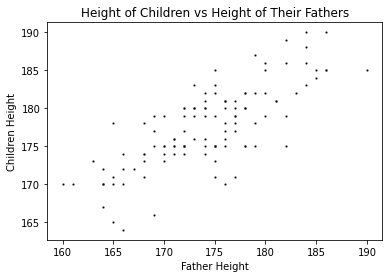

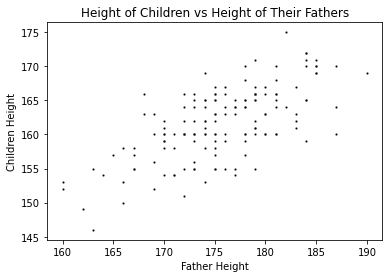

<Figure size 432x288 with 0 Axes>

In [4]:
# plot the data in a pairplot using the seaborn package and title it appropriately. 
plot_color(df_M, "black")
plt.title("Height of Children vs Height of Their Fathers")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()

plot_color(df_F, "black")
plt.title("Height of Children vs Height of Their Fathers")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()




# give some comments on the structure of the data. 
From both graphs, we can clearly observe an positive linear relationship between the height of the children and the height of their fathers.

Plot the same data in a pairplot using the seaborn package. Title it approprietly, AND, 
color the points by the GENDER variable. 
- Females in red 
- Males in blue

Give some comments on the structure of the data. Specifically whether the assumptions for a linear model fit are valid or not. 

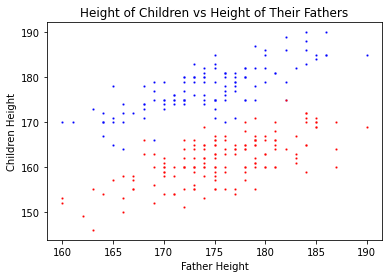

<Figure size 432x288 with 0 Axes>

In [5]:
# plot the data with respective colours. 
plot_color(df_M, "blue")
plot_color(df_F, "red")
plt.title("Height of Children vs Height of Their Fathers")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()


# now give some comments on the structure of the data

From the graph above, we can clear see there are two data clusters for female data and male data. And when the children's fathers' heights are about the same, a male child seems to be taller than a female child.

Fit a linear model using the following setup: 
`HEIGHT ~ HEIGHT.F`, ie. can the father's height predict the child's hight. Denote this linear model as 
`lm_general`, i.e. a linear model for the general dataset. 

Calculate the MSE of `lm_general`. 

In [6]:
# declare model. 
y = df["HEIGHT"]
X = df[["HEIGHT.F"]]
lm_general = LinearRegression() 

# fit model. 
lm_general.fit(X,y) 
pred = lm_general.predict(X)

# MSE. 
MSE = mean_squared_error(y, pred)
print(f"MES for lm_general is: {MSE}")

MES for lm_general is: 81.54862159643423


Fit two linear models using the same setup 
`HEIGHT ~ HEIGHT.F`, on the dataframes `df_m` and `df_f`, the two segmented by gender populations. 

You should have two different model objects, name them 
`lm_male` and `lm_female`. 

report the aggregate MSE for both models. Ie.
- MSE_F
- MSE_M  
- MSE_AGGREGATE = MSE_F + MSE_M 

Comment on the difference between the MSE performance of these models vs the previous, general model. 



In [7]:
# declare models for each gender. 
y_M = df_M["HEIGHT"]
X_M = df_M[["HEIGHT.F"]]
lm_male = LinearRegression() 

y_F = df_F["HEIGHT"]
X_F = df_F[["HEIGHT.F"]]
lm_female = LinearRegression() 

# fit model. 
lm_male.fit(X_M,y_M)
lm_female.fit(X_F,y_F)

# fit male
pred_M = lm_male.predict(X_M)

# fit female
pred_F = lm_female.predict(X_F)

In [8]:
# calculate MSE's
MSE_M = mean_squared_error(y_M, pred_M)
print(f"MES for lm_male is: {MSE_M}")

MSE_F = mean_squared_error(y_F, pred_F)
print(f"MES for lm_female is: {MSE_F}")

MSE_AGGREGATE = MSE_F + MSE_M
print(f"MES for AGGREGATE is: {MSE_AGGREGATE}")

MES for lm_male is: 11.312106388928363
MES for lm_female is: 15.337041297553613
MES for AGGREGATE is: 26.649147686481975


# comment on results. 

Clearly we obtain a much better result when segmenting dataset to male and female and fit a model for each segment individually. The MSE for the AGGREGATE of male model and female model is also much smaller the MSE when we fit the data with one single linear regression model. 

Render a scatter plot of `x=HEIGHT.F` and `y=HEIGHT` in grey points. 

- Plot the predicted fits of the `lm_general` model in black. (Black line)
- Plot the predictive fits of the `lm_male` model in blue. (Blue line)
- Plot the predictive fits of the `lm_female` model in red. (Red line) 

All superimposed on the same plot. So the plot should have grey points, one black line, one red line, and one blue line. Title it appropriately. 

Comment on how/why segmentation improves the model fit. Be sure to address the assumptions of a linear regression model. 

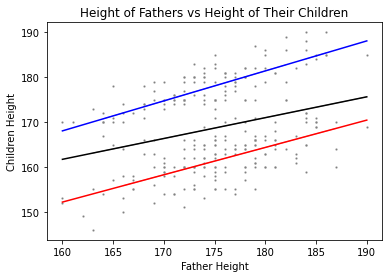

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot the fits of the lm models, you need three lines, one blue, one black, and one red.  
# points are in grey.  

# don't forget to title it correctly! 


plot_color(df)
sns.lineplot(x=df["HEIGHT.F"], y = pred, 
                     color = "black") 
sns.lineplot(x=df_M["HEIGHT.F"], y = pred_M, 
                     color = "blue") 
sns.lineplot(x=df_F["HEIGHT.F"], y = pred_F, 
                     color = "red") 
plt.title("Height of Fathers vs Height of Their Children")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()


---
# Part 2 Logistic and Weighted Linear Regression 
---

Fit a logistic regression model predicting gender as `GENDER ~ WEIGHT`, name it `lm_logreg`. 

Render a scatter plot with the `x=HEIGHT.F`, `y=HEIGHT` with the points colored by the predicted gender of the `lm_logreg` model. 
- Females in red. 
- Males in blue. 

Using the visual, comment on the performance of the logistic regression to segment populations. Use one of subplots for the pairplot in Part 1 to justify the performance of the model. 

In [10]:
# do a logistic model predicting GENDER 

# predict class. 

# free function to help you with creating colors just for you. 
def map_colors(x): 
  if x == "F":
    return "red"
  else: 
    return "blue"

# create color np.array 

In [11]:
# plot scatter plot with logistic regression labels by color. 
lm_logreg = LogisticRegression()

Xr = df[['WEIGHT']]
labs = df['GENDER'] 
lm_logreg.fit(Xr,labs)

labs_hat = lm_logreg.predict(Xr)

In [ ]:
# plot the data with respective colours. 
plot_color(df_M, "blue")
plot_color(df_F, "red")
plt.title("Height of Children vs Height of Their Fathers")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()

In [ ]:
fig1 = plt.subplots()
df['color'] = np.array([map_colors(lab) for lab in labs_hat])
sns.scatterplot(x=df["HEIGHT.F"], y = df["HEIGHT"], 
                     color = df['color'], 
                     s = 5.0) 

plt.title("Estimated Height of Children vs Height of Their Fathers")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()

# comment on the results. 
From the graphs above, we can see our estimation using the logistic regression is decent and reflect the general pattern of the dataset. Howver, there are also some data points which our model fails to predict it to the right group.

Acquire the probabilities from the logistic regression model, denote the probability matrix `Z`. The matrix should be `(270,2)` in shape, each entry denoting the probability for each observation `i` belonging to group `g`. ie. `z_ig`. 

For each column, create two weighted linear regression models denoted as `lm_female_weighted` and `lm_male_weighted`.

In [ ]:
# calculate the weights of a logistic model, then use them for a weighted regression. 
Z = lm_logreg.predict_proba(Xr)
weights_1 = Z[:,0]
weights_2 = Z[:,1]

# declare the weighted models. 
lm_female_weighted = LinearRegression() 
lm_male_weighted = LinearRegression() 

# fit the models. 
lm_female_weighted.fit(X, y, sample_weight = weights_1)
lm_male_weighted.fit(X, y, sample_weight = weights_2)

female_weighted_pred = lm_female_weighted.predict(X)
male_weighted_pred = lm_male_weighted.predict(X)



Plot the data points in grey, plot the predicted fits of the general population for each linear model. 

- `lm_male_weighted` prediction in blue (blue line)
- `lm_female_weighted` prediction in red (red line)

Title it appropriately and comment on the weighted model fits compared to the `lm_general` model. 

In [ ]:
# Plot the fits of the lm models. 
plot_color(df) 
sns.lineplot(x=df["HEIGHT.F"], y = male_weighted_pred, 
                     color = "blue") 
sns.lineplot(x=df["HEIGHT.F"], y = female_weighted_pred, 
                     color = "red") 
plt.title("Height of Fathers vs Height of Their Children")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()


# comment on the results of the weighted linear regression. 

Clearly, by give each model weights obtained from the logistic regression, we get a better result than fit everything in one single model. However, this models still perform worse than the two models where we know the
true labels of male vs female.

---
## Part 3: Finite Mixture Modelling 
---

Fit an appropriate finite mixture model to the dataset. Determine the optimal number of components `G` using BIC.

To achieve a 4 you must appropriately model both the conditional distribution of `HEIGHT ~ HEIGHT.F` and the covariate distribution for `HEIGHT.F` within the context of a finite mixture model. 

In [ ]:
class flm_model(nn.Module):
    """
        Class for Finite mixtures of Linear models. 
    """
   
    def __init__(self, G:int, data: torch.Tensor):
        """
            Constructor class for finite mixtures of linear models.  
        """
        
        if not isinstance(data, torch.Tensor):
            raise Exception("data is not of torch.Tensor type") 

        super(flm_model, self).__init__() 

        # define constants. 
        self.n = data.shape[0] 
        self.G = G if G > 0 else exec("raise Exception('G has to be valid')") 

        # define data 
        self.X = data[:,1:]
        self.X = torch.concat( (self.X, torch.ones(self.n,1)), axis=1)
        self.y = data[:,0]

        # first column is y, the rest are covariates. 
        self.p = self.X.shape[1] 

        # define actual parameters. 
        self.betas = torch.rand(G,self.p) 
        self.sigmas = torch.rand(G,1).abs() 
        self.w = torch.rand(G,1) # define weights.  

        # set gradients. 
        self.w.requires_grad = True; 
        self.betas.requires_grad = True;
        self.sigmas.requires_grad = True; 
        self.leading_constants = - 0.5 * torch.Tensor([2.0 * torch.pi]).log()

    def compute_weights(self):
        """
            get mixing proportions. 
        """
        return softmax(self.w[:,0], dim=0)


    def log_density(self, X, y) -> torch.Tensor:
        """
            Takes in a covariate dataset X, and sample y, 
            computes an (n x G) matrix of log densities. 
        """
        
        # calculate log density. 
        ldens = torch.zeros(self.n, self.G) 

        # loop through the groups. 
        for g in range(0,self.G):

            # compute linear model.
            y_hats = (self.betas[g] * self.X).sum(-1)  
            
            # compute exponential terms. 
            exp_terms = - 0.5 * ((y_hats - y) / self.sigmas[g]).pow(2) 
            ldens[:,g] = exp_terms + self.leading_constants 
            ldens[:,g] += - self.sigmas[g].log() 
            
        return ldens  

        
    def objective_fn(self, X, y):
        """
            Objective function to minimize on, 
            takes in an (n x d + 1) matrix with the response variable 
            in the first column 
        """
        
        # compute log densities. 
        dens = self.log_density(X, y).exp() 

        # get weights. 
        W = self.compute_weights() 
        
        return -((dens * W).sum(-1).log()).sum() 
        
    def train(self, lr=1e-3, max_iterations=1000): 
        """
            train using some gradient descent algorithm 
        """

        # define optimizer 
        optimizer = torch.optim.Adam([self.w, 
                                      self.betas, 
                                      self.sigmas], lr=lr)
        # track loss 
        loss = np.zeros(max_iterations)
        tq_obj = tqdm(range(max_iterations), desc="Model Training")
       
        for it in tq_obj:
            optimizer.zero_grad() 
            cost = self.objective_fn(self.X, self.y)
            cost.backward() # compute gradient. 
            optimizer.step() 

            loss[it] = cost.data.cpu().numpy() 
            
            # log the loss. 
            if it % 100 == 0:    
                tqdm.write(f"Loss: {loss[it]}  λ: {optimizer.param_groups[0].get('lr')}")

    def fit(self, X, betas):                                                                                                                            
        """                                                                                                                                              
           Take input covariate X and fits using the coefficients betas.                                                                                
           Returns an (n x G) matrix, one for every component                                                                                           
        """                                                                                                                                              
        
        ys = torch.zeros(X.shape[0], betas.shape[0])                                                                                                     
        
        for g in range(self.G):                                                                                                                         
            ys[:,g] = (betas[g] * X).sum(-1)                                                                                                             
        
        return ys                                                                                                                                        

    def BIC(self):
        """
            Calculates the Bayesian Information Criterion for model performance comparisons.
        """

        # calculate number of parameters. 
        rho = self.betas.numel() + self.sigmas.numel() + self.w.numel()
        bic = self.objective_fn(self.X, self.y) * (-2.0) - rho * m.log(self.y.shape[0])
        return float(bic.detach())


    def plot(self, col):
        """
            col: reference column
        """
         
        plot_df = torch.concat((self.y.unsqueeze(-1), self.X), dim=1)
        plot_df = pd.DataFrame(plot_df.detach().numpy())
        plot_df = plot_df[[0,col]]
        
        sns.scatterplot(x=plot_df[col], y=plot_df[0], color="grey",s=2.0) 
        
        y_fits = self.fit(self.X, self.betas)

        for g in range(self.G):
            plot_df['y_fit'] = y_fits[:,g].detach().numpy()  
            sns.scatterplot(x=plot_df[col], y=plot_df['y_fit'], color="red", s=2.0)

        plt.savefig("flm-fit.png") 
        plt.clf() 

    def plot_colors(self, col, labs):
        """
            col: reference column. 
            labs: integer np.array 
        """
        
        color_plt = sns.color_palette("bright", int(np.max(labs)) + 1)
        
        plot_df = torch.concat((self.y.unsqueeze(-1), self.X), dim=1)
        plot_df = pd.DataFrame(plot_df.detach().numpy())
        plot_df = plot_df[[0,col]]
        plot_df['color'] = pd.Series(labs).apply(lambda x: color_plt[x])

        sns.scatterplot(x=plot_df[col], y=plot_df[0], color=plot_df['color'],s=2.0)         

#         plt.savefig("flm-fit-color.png") 
#         plt.clf() 

    def Estep(self, X, y):
        """
            Computes the expectation step using parameters for X ,y
        """
        
        with torch.no_grad():
            dens = self.log_density(X, y).exp()

            W = self.compute_weights() 
            dens = dens * W
            
            d_sum = dens.sum(-1).unsqueeze(-1)
            dens = dens / d_sum 

            dens[:,-1] = 1.0 - dens[:,:-1].sum(-1)
        
        return dens 

    def MAP(self, X, y):
        """
            Computes labels using the maximum a posterori 
        """
        
        dens = self.Estep(X,y)
        labs = dens.argmax(-1) 
        labs = labs.detach().numpy()
        labs = labs.astype(int)
        return labs 



In [ ]:
# define data. 
G = 2

data_df = load_df()
labs = data_df['GENDER'].to_numpy()

data_df.HEIGHT = np.log(data_df.HEIGHT)
X = data_df[['HEIGHT.F']]
y = data_df['HEIGHT'] 

data_s = data_df[['HEIGHT','HEIGHT.F']].to_numpy()
data_s = torch.Tensor(data_s)
data_s = (data_s - data_s.mean())/data_s.std()  

# define model. 
flm = flm_model(G=G, data=data_s)

# run a training 
flm.train(lr=1e-3, max_iterations=1000)

In [ ]:
for g in range(1, 5):
    
    flm_g =  flm_model(G=g, data=data_s)
    flm_g.train(lr=1e-3, max_iterations=1000)
    print(f"The BIC with G = {g} is {flm_g.BIC()}")
    

### Plot Mixture Model Results 

Acquire the labels of the model by taking the maximum of the a-posteriori. (MAP) Render a scatter plot of 
`x=HEIGHT.F`, `y=HEIGHT`, with the colors being the labels given by the MAP's. 

- Males should be colored in blue.
- Females should be colored in red. 

comment on the ability of the finite mixture model to segment the population in an unsupervised manner. 

In [ ]:
# get MAP labels. 
labs = flm.MAP(flm.X, flm.y)
flm.plot_colors(1, labs)

plt.title("Height of Fathers vs Height of Their Children")
plt.ylabel("Children Height")
plt.xlabel("Father Height")
plt.show()
plt.clf()

plt.show()
plt.clf()

# declare colours and plot HEIGHT.F vs HEIGHT. 

### Classification Table
Use the following function (`table_counts`) to create a classification table. 
Pass in the GENDER column as well as the output of the MAP labels, and comment on the ability of the Finite mixture model to correctly classify the sub-populations. 


In [ ]:
def table_counts(x: np.array, y: np.array, labels=["x","y"]) -> None:
  """
    Creates a classification table to visually assess misclassification. 
  """

  table_df = pd.DataFrame({labels[0]: x, labels[1]: y})
  print(table_df.groupby(labels).size().unstack())

# get the classification table. 

# comment on the performance of the finite mixture model. 